# Exercise 3 - Pixel wise operations

**TA comment**: Be aware that default behaviour of matplotlib.pyplot.imshow() is to use the dynamic range of the image values to plot the image. It is, if the image intensities range from [26, 173], the white color is assigned to 26 and the black to 173. Meanwhile, skimage.io.imshow() displays the dynamic range according to the image type, [0, 255] for integer images and [0., 1.] for float images.

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Explorative data analysis

### Exercise 1
Start by reading the image and inspect the histogram. Is it a bimodal histogram? Do you think it will be possible to segment it so only the bones are visible?

In [2]:
# Directory containing data and images
in_dir = "data/"
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)

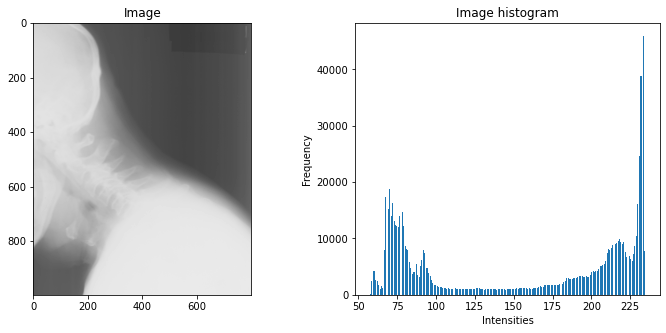

In [3]:
nbins = 256

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Image')

ax[1].hist(im_org.ravel(), bins=nbins)
ax[1].set_title('Image histogram')
ax[1].set_xlabel('Intensities')
ax[1].set_ylabel('Frequency')
plt.show()

### Exercise 2
Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?

In [4]:
min, max = im_org.min(), im_org.max()
print(f"Min value: {min} \t Max value: {max}")

Min value: 57 	 Max value: 235


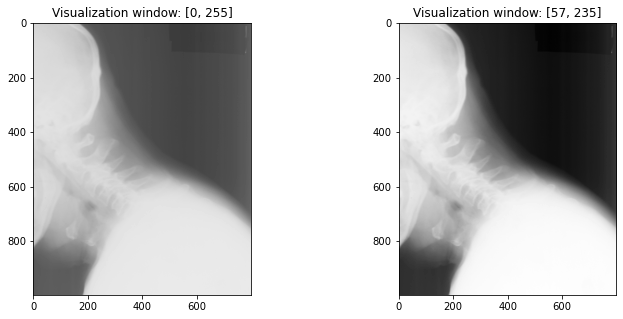

In [5]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, vmin = 0, vmax = 255, cmap = 'gray')
ax[0].set_title('Visualization window: [0, 255]')
ax[1].imshow(im_org, vmin = min, vmax = max, cmap = 'gray')
ax[1].set_title(f'Visualization window: [{min}, {max}]')
plt.show()

## Pixel type conversions

### Exercise 3 - Unsigned byte to float image

In [6]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [7]:
im_float = img_as_float(im_org)
min, max = im_float.min(), im_float.max()
print(f"Min value: {min} \t Max value: {max}")

 # Can you verify that the float image is equal to the original image, where each pixel value is divided by 255?
all_equal = np.allclose(im_org, im_float*255)
print(f'The float and the original image are equivalent?: {all_equal}')

Min value: 0.22352941176470587 	 Max value: 0.9215686274509803
The float and the original image are equivalent?: True


### Exercise 4 - Float to unsigned byte

In [8]:
im_ubyte = img_as_ubyte(im_float)
min, max = im_ubyte.min(), im_ubyte.max()
print(f"Min value: {min} \t Max value: {max}")

Min value: 57 	 Max value: 235


## Histogram stretching

### Exercise 5

In [9]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = ((img_float-min_val)*(max_desired-min_desired)/(max_val-min_val))+min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

### Exercise 6

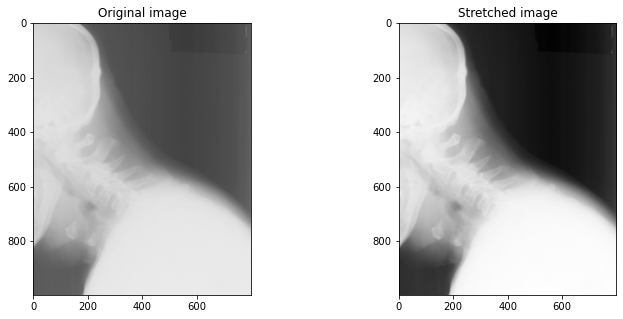

In [10]:
im_stretched = histogram_stretch(im_org)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_stretched, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Stretched image')
plt.show()

## Non-linear pixel value mapping

### Exercise 7

In [11]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)

### Exercise 8

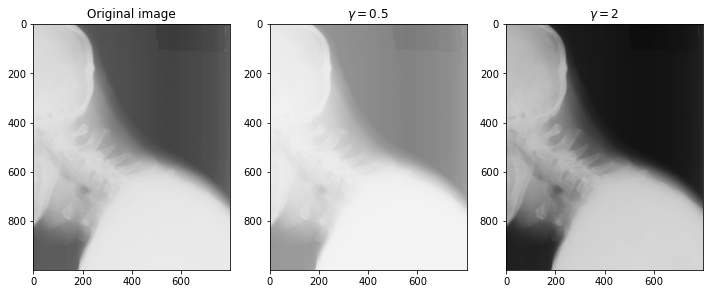

In [12]:
gamma_0_5 = gamma_map(im_org, 0.5)
gamma_2 = gamma_map(im_org, 2)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin=0, vmax=255)
ax[0].set_title('Original image')
ax[1].imshow(gamma_0_5, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title(r'$\gamma = 0.5$')
ax[2].imshow(gamma_2, cmap = 'gray', vmin=0, vmax=255)
ax[2].set_title(r'$\gamma = 2$')
plt.show()

## Image segmentation by thresholding

### Exercise 9

In [13]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    return img_as_ubyte(mask)

### Exercise 10

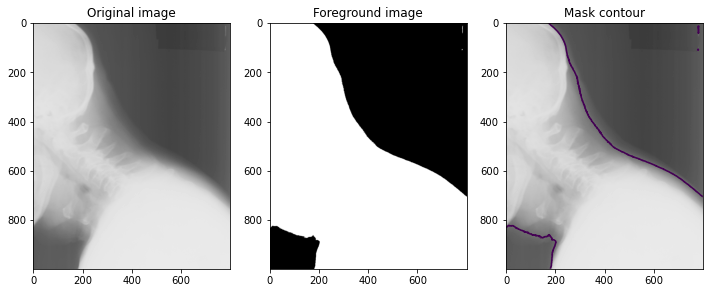

In [14]:
im_thres = threshold_image(im_org, thres = 110)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Foreground image')
ax[2].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].contour(im_thres, [254, 256])
ax[2].set_title('Mask contour')
plt.show()

### Exercise 11

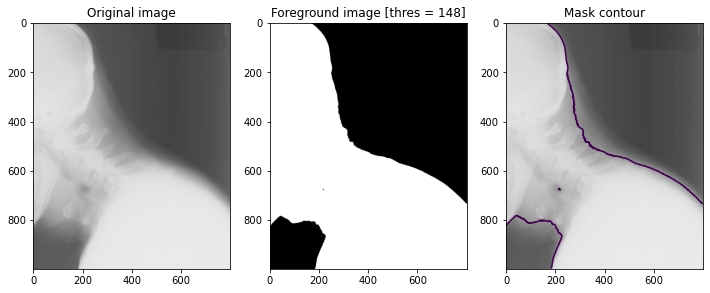

In [15]:
from skimage.filters import threshold_otsu

thres_new = threshold_otsu(im_org)
im_thres = threshold_image(im_org, thres = thres_new)

fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (12, 5))
ax[0].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title(f'Foreground image [thres = {thres_new}]')
ax[2].imshow(im_org, cmap = 'gray', vmin = 0, vmax = 255)
ax[2].contour(im_thres, [254, 256])
ax[2].set_title('Mask contour')
plt.show()

### Exercise 12

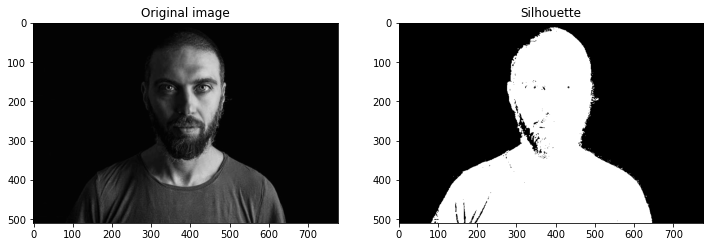

In [16]:
from skimage.color import rgb2gray

im_name = "dark_background.png"
im_org = io.imread(in_dir + im_name)

im_org = img_as_float(im_org)
im_gray = img_as_ubyte(rgb2gray(im_org))

thres = 5
im_thres = threshold_image(im_gray, thres = thres)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(im_gray, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(im_thres, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title(f'Silhouette')
plt.show()

## Color thresholding in the RGB color space

### Exercise 13

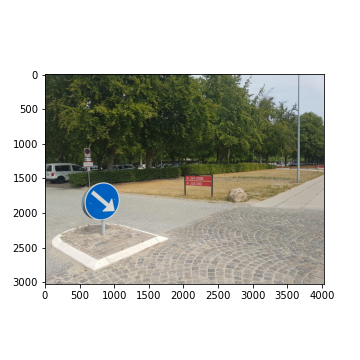

In [24]:
# Change the backend to be able to explore the pixel intensities
# For VSCode Notebooks and JupyterNotebook "%matplotlib widget"
# For Spyder "%matplotlib auto"

%matplotlib widget 

im_name = "DTUSigns2.jpg"
im_org = io.imread(in_dir + im_name)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
ax.imshow(im_org)
plt.show()

### Exercise 14

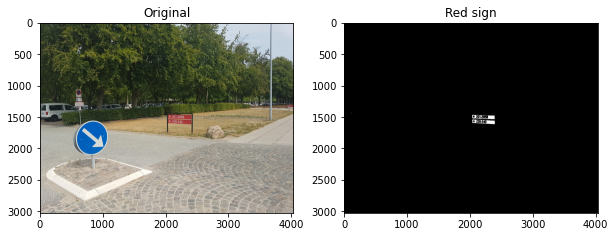

In [18]:
%matplotlib inline 

def detect_dtu_signs(img_in, sign):
    r_comp = im_org[:, :, 0]
    g_comp = im_org[:, :, 1]
    b_comp = im_org[:, :, 2]

    if sign == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    if sign == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                    (b_comp > 180) & (b_comp < 200)

    return img_as_ubyte(segm)

img_red = detect_dtu_signs(im_org, 'red')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].imshow(im_org)
ax[0].set_title('Original')
ax[1].imshow(img_red, vmin = 0, vmax = 255, cmap = 'gray')
ax[1].set_title('Red sign')
plt.show()

## Color thresholding in the HSV color space

### Exercise 15

In [19]:
from skimage import color

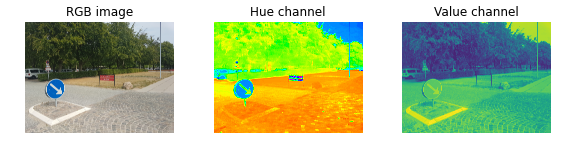

In [20]:
%matplotlib widget 

hsv_img = color.rgb2hsv(im_org)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_org)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()

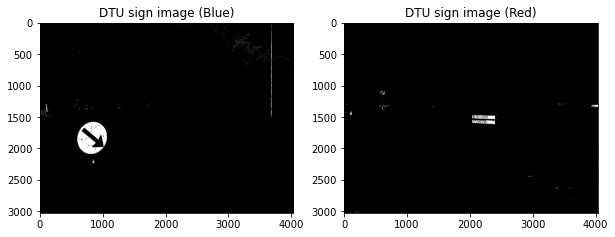

In [21]:
%matplotlib inline 

segm_blue = (hue_img < 0.6) & (hue_img  > 0.4) & (value_img < 0.77) & (value_img > 0.70)
segm_red = (hue_img < 1.0) & (hue_img  > 0.9)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()

## Real time pixel-wise operations on videos

### Exercise 16

In [22]:
!python Ex3-VideoPixelWiseOperations.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@9.509] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback


### Exercise 17

In [23]:
!python Ex3-Ex17.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@8.158] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback


### Exercise 18

In [25]:
!python Ex3-Ex18.py

Starting image capture

[ WARN:0@8.014] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback



Opening connection to camera
Starting camera loop
Stopping image loop
